In [63]:
from IPython.display import Markdown, display

import os

import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import fisher_exact

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
if os.path.exists('src'):
    %load_ext autoreload
    %autoreload 2
else:
    !git clone https://github.com/P-Mihail/medstats_ex.git

from src.chi2_test import chi2_test
from src.utils import combine_rows, combine_cols
from src.plot import barplot_ct

### Глава 5
#### Анализ качественных признаков

##### ТОЧНОСТЬ ОЦЕНКИ ДОЛЕЙ

$\sigma_{\hat{p}} = \cfrac{\sigma}{\sqrt n} = \sqrt{\cfrac{p(1-p)}{n}}$ - стандартная ошибка доли.

$\sigma = \sqrt{p(1-p)}$ - стандартное отклонение, $n$ - объем выборки.

заменив истинное значениедоли $p$ на её оценку $\hat p$ получаем оценку стандартной ошибки доли: $S_{\hat{p}} = \sqrt{\cfrac{\hat{p}(1-\hat{p})}{n}}$

Из ЦПТ следует, что при достаточно большом объеме выборки $\hat{p}$ приближенно подчиняется нормальному распределению, имеющему среднее $р$ и стандартное отклонение $\sigma_{\hat{p}}$. Однако при значениях $р$, близких к 0 или 1, и при малом объеме выборки это не так!

Условие применомости оценки: $n\hat{p} > 5$ и $n(1 - \hat{p}) > 5$

##### СРАВНЕНИЕ ДОЛЕЙ (качественный признак принимает два значения, число выборок тоже равно двум)

z - критерий (аналогично t критерию Стьюденты)

$z = \cfrac{Разность\ выборочных\ долей}{Стандартная\ ошибка\ разности\ выборочных\ долей} = \cfrac{\hat{p_1}-\hat{p_2}}{S_{\hat{p_1}-\hat{p_2}}} = \cfrac{\hat{p_1}-\hat{p_2}}{\sqrt{S^2_{\hat{p_1}} + S^2_{\hat{p_2}}}} = \cfrac{\hat{p_1}-\hat{p_2}}{\sqrt{\cfrac{\hat{p_1}(1-\hat{p_1})}{n_1} + \cfrac{\hat{p_2}(1-\hat{p_2})}{n_2}}}$

Если нулевая гипотеза верна, то обе выборочные доли $\hat{p_1}=\cfrac{m_1}{n_1}$ и $\hat{p_2}=\cfrac{m_2}{n_2}$ — это две оценки одной и той же доли $\hat{p}$, которую, следовательно, можно оценить как: $\hat{p}=\cfrac{m_1 + m_2}{n_1 + n_2}$

Тогда: $z = \cfrac{\hat{p_1}-\hat{p_2}}{\sqrt{\hat{p}(1-\hat{p})(\cfrac{1}{n_1} + \cfrac{1}{n_2})}}$

$z$ подчиняется стандартному нормальному распределению => критические значения $z$ для 5% уровня значимости = 1,96, для 1% — 2,58.

**поправка Йеитса** называемая также **поправкой на непрерывность**

Нормальное распределение служит лишь приближением для распределения $z$. При этом оценка $P$ оказывается заниженной, и нулевая гипотеза будет отвергаться слишком часто. Причина состоит в том, что $z$ принимает только дискретные значения, тогда как приближающее его нормальное распределение непрерывно.

Поправка Йейтса слегка уменьшает значение $z$, уменьшая тем самым расхождение с нормальным распределением.

$z = \cfrac{|\hat{p_1}-\hat{p_2}| - \cfrac{1}{2}(\cfrac{1}{n_1} + \cfrac{1}{n_2})}{\sqrt{\hat{p}(1-\hat{p})(\cfrac{1}{n_1} + \cfrac{1}{n_2})}}$

##### ТАБЛИЦЫ СОПРЯЖЕННОСТИ: КРИТЕРИЙ $\chi^2$

число значений признака и число выборок может быть большим двух.


Критерий $\chi^2$ не требует никаких предположений относительно параметров совокупности, из которой извлечены выборки (непараметрический критерий).

$\chi^2 = \sum\cfrac{(O - E)^2}{E}$, где $O$ - наблюдаемое число в клетке таблицы сопряженности, $E$ - ожидаемое число в той же клетке. Суммирование проводится по всем клеткам таблицы.


Критическое значений $\chi^2$ зависит от размера матрицы сопряженности, то есть от числа сравниваемых методов (строк таблицы) и числа возможных исходов (столбцов таблицы). Размер таблицы выражается числом степеней свободы $v$: $ν = (r – 1)(c – 1)$, где $r$ — число строк, а $с$ — число столбцов.

**Критерии $\chi^2$ для таблицы 2×2**

для таблиц сопряженности размером 2×2 выполняется равенство: $\chi^2 = z^2$ 

**поправка Йеитса** (только для таблиц 2х2)

$\chi^2 = \sum\cfrac{|O - E| - \cfrac{1}{2}}{E}$

**Общий порядок применения критерия $\chi^2$**
* Постройте по имеющимся данным таблицу сопряженности.
* Подсчитайте число объектов в каждой строке и в каждом столбце и найдите, какую долю от общего числа объектов составляют эти величины.
* Зная эти доли, подсчитайте с точностью до двух знаков после запятой ожидаемые числа — количество объектов, которое попало бы в каждую клетку таблицы, если бы связь между строками и столбцами отсутствовала.
* Найдите величину, характеризующую различия наблюдаемых и ожидаемых значений. Если таблица сопряженности имеет размер 2×2, примените поправку Йеитса.
* Вычислите число степеней свободы, выберите уровень значимости и по таблице, определите критическое значение $\chi^2$. Сравните его с полученным для вашей таблицы.

##### Применимость критерия $\chi^2$:

Применение критерия  $\chi^2$ для таблицы 2х2 правомерно, если ожидаемое число в любой из клеток больше или равно 5.

В общем случае критерии  $\chi^2$ применим, если все ожидаемые числа не меньше 1 и доля клеток с ожидаемыми числами меньше 5 не превышает 20%. Если это не так, то можно попробовать объединить несколько строк или столбцов.

##### Преобразование таблиц сопряженности

Перед объединением в одну группу надо проверить гипотезу об отсутствии межгрупповых различий.

Поскольку осуществляется несколько сравнений с использованием одних и тех же данных, необходимо использовать поправку Бонферрони, умножая уровень значимости на число сравнений!!!

##### ТОЧНЫЙ КРИТЕРИЙ ФИШЕРА

Когда число наблюдений невелико, невыполняется услование применимости критерия $\chi^2$. В этом случае используют точный критерий Фишера. Он основан на переборе всех возможных вариантов заполнения таблицы сопряженности при данной численности групп, поэтому, чем она меньше, тем проще его применить.

Нулевая гипотеза состоит в том, что между группами и исходом нет никакой связи. Тогда вероятность получить некоторую таблицу равна:

$P = \cfrac{\cfrac{R_1!R_2!C_1!C_2!}{N!}}{O_{11}!O_{12}!O_{21}!O_{22}!}$, где $R_1$ и $R_2$ — суммы по строкам, $С_1$ и $С_2$ — суммы по столбцам. $O_{11}$, $O_{12}$, $O_{21}$ и $O_{22}$ — числа в клетках, $N$ — общее число наблюдений.

Построив все остальные варианты заполнения таблицы, возможные при данных суммах по строкам и столбцам, по этой же формуле рассчитывают их вероятность. Вероятности, которые не превосходят вероятность исходной таблицы (включая саму эту вероятность), суммируют. Полученная сумма — это величина P для двустороннего варианта точного критерия Фишера.

Для построения всех вариантов заполнения таблицы в одной из клеток перебираются все целые числа от нуля до максимально возможного, пересчитывая числа в остальных клетках так, чтобы суммы по строкам и столбцам оставались неизменными.

**5.1.**

Т. Бишоп (Т. Bishop. High frequency neural modulation in dentistry. J. Am. Dent. Assoc., 112:176—177, 1986) изучил эффективность высокочастотной стимуляции нерва в качестве обезболивающего средства при удалении зуба. Все больные подключались к прибору, но в одних случаях он работал, в других был выключен. Ни стоматолог, ни больной не знали, включен ли прибор. Позволяют ли следующие данные считать высокочастотную стимуляцию нерва действенным анальгезируюшим средством?

-|Прибор включен|Прибор выключен
-|-|-
Боли нет|24|3
Боль есть|6|17

,Боли нет,Боль есть
Прибор включен,24,3
Прибор выключен,6,17


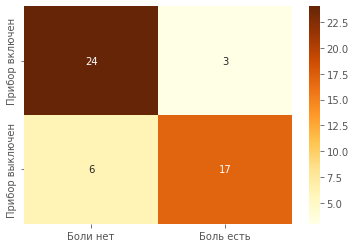

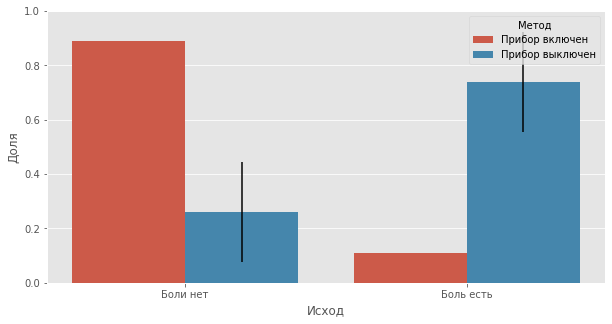

chi^2 = 17.878, v=1, P=0.000
Отличия статистически значимы.


In [3]:
df = pd.DataFrame(data=[[24, 3], [6, 17]], columns=["Боли нет", "Боль есть"], index=["Прибор включен", "Прибор выключен"])

display(df)

sns.heatmap(df, annot=True, cmap="YlOrBr")
barplot_ct(df)

chi2_test(df, silent=False)

Да, позволяют: $\chi^2$= 17,878; ν = 1; Р = 2.35e-05 < 0,001.

**5.2.**

Синдром внезапной детской смерти — основная причина смерти детей в возрасте от 1 недели до 1 года. Обычно смерть наступает на фоне полного здоровья незаметно, во сне, поэтому
определение факторов риска имеет первостепенное значение.

Считается, что синдром внезапной детской смерти чаще случается у недоношенных детей, негров, а также в семьях с низкими доходами. Н. Левак и соавт. (N. Lewak et al. Sudden infant death syndrome risk factors: prospective data review. Clin. Pediatr., 18:404—411, 1979) решили уточнить эти данные. Исследователи собрали сведения о 19047 детях, родившихся в одном из роддомов Окленда, штат Калифорния, с 1960 по 1967 г. Судьбу детей проследили до 1 года. Данных о 48 детях получить не удалось.

От синдрома внезапной детской смерти умерли 44 ребенка. Данные о предполагаемых факторах риска представлены в таблице. Найдите признаки, связанные с риском синдрома внезапной детской смерти.


Фактор| |+|–
-|-|-|-
Возраст матери|До 25 лет|29|7301
| |25 лет и старше|15|11241
Время от окончания предыдущей беременности|Менее 1 года|23|4694
||Более 1 года|11|7339
Планировалась ли беременность|Нет|23|7654
||Да|5|4253
Повторная беременность|Нет|36|12987
||Да|8|4999
Курение во время беременности|Да|24|5228
||Нет|10|9595
Посещения врача во время беременности|Менее 11 раз|31|10512
||11 раз или более|11|8154
Самый низкий гемоглобин во время беременности|Менее 12 мг%|26|12613
||12 мг% и более|7|2678
Раса|Белые|31|12240
||Негры|9|4323
||Другие|4|2153

In [4]:
df = pd.DataFrame(data=[[29, 7301], [15, 11241], [23, 4694], [11, 7339], [23, 7654],
                        [5, 4253], [36, 12987], [8, 4999], [24, 5228], [10, 9595],
                        [31, 10512], [11, 8154], [26, 12613], [7, 2678], [31, 12240],
                        [9, 4323], [4, 2153]], 
                 columns=["+", "-"], 
                 index=pd.MultiIndex.from_arrays([["Возраст матери", "Возраст матери", "Время от окончания предыдущей беременности", 
                     "Время от окончания предыдущей беременности", "Планировалась ли беременность", "Планировалась ли беременность", 
                     "Повторная беременность", "Повторная беременность", "Курение во время беременности", "Курение во время беременности", 
                     "Посещения врача во время беременности", "Посещения врача во время беременности", "Самый низкий гемоглобин во время беременности", 
                     "Самый низкий гемоглобин во время беременности", "Раса", "Раса", "Раса"], ["До 25 лет", "25 лет и старше", "Менее 1 года", 
                     "Более 1 года", "Нет", "Да", "Нет", "Да", "Да", "Нет", "Менее 11 раз", "11 раз или более", "Менее 12 мг%", "12 мг% и более", 
                     "Белые", "Негры", "Другие"]]))

display(df)

+      -
Возраст матери                                До 25 лет         29   7301
                                              25 лет и старше   15  11241
Время от окончания предыдущей беременности    Менее 1 года      23   4694
                                              Более 1 года      11   7339
Планировалась ли беременность                 Нет               23   7654
                                              Да                 5   4253
Повторная беременность                        Нет               36  12987
                                              Да                 8   4999
Курение во время беременности                 Да                24   5228
                                              Нет               10   9595
Посещения врача во время беременности         Менее 11 раз      31  10512
                                              11 раз или более  11   8154
Самый низкий гемоглобин во время беременности Менее 12 мг%      26  12613
                                              12 мг% и более     7   2678
Раса                                          Белые             31  12240
                                              Негры              9   4323
                                              Другие             4   2153

In [5]:
for i, (factor, new_df) in enumerate(df.groupby(level=0), start=1):
    display(Markdown(f"##### {i}. {factor}:"))
    display(new_df.droplevel(0))
    
    chi2_test(new_df, silent=False)

    display(Markdown("---"))

##### 1. Возраст матери:

,+,-
До 25 лет,29,7301
25 лет и старше,15,11241


chi^2 = 11.852, v=1, P=0.001
Отличия статистически значимы.


---

##### 2. Время от окончания предыдущей беременности:

,+,-
Менее 1 года,23,4694
Более 1 года,11,7339


chi^2 = 10.506, v=1, P=0.001
Отличия статистически значимы.


---

##### 3. Курение во время беременности:

,+,-
Да,24,5228
Нет,10,9595


chi^2 = 17.002, v=1, P=0.000
Отличия статистически значимы.


---

##### 4. Планировалась ли беременность:

,+,-
Нет,23,7654
Да,5,4253


chi^2 = 3.144, v=1, P=0.076
Отличия статистически не значимы.


---

##### 5. Повторная беременность:

,+,-
Нет,36,12987
Да,8,4999


chi^2 = 1.571, v=1, P=0.210
Отличия статистически не значимы.


---

##### 6. Посещения врача во время беременности:

,+,-
Менее 11 раз,31,10512
11 раз или более,11,8154


chi^2 = 4.527, v=1, P=0.033
Пограничный случай, есть основания задуматься над наличием различий.


---

##### 7. Раса:

,+,-
Белые,31,12240
Негры,9,4323
Другие,4,2153


chi^2 = 0.527, v=2, P=0.769
Отличия статистически не значимы.


---

##### 8. Самый низкий гемоглобин во время беременности:

,+,-
Менее 12 мг%,26,12613
12 мг% и более,7,2678


chi^2 = 0.108, v=1, P=0.742
Отличия статистически не значимы.


---

Статистически значимые различия (факторы риска):
* Возраст матери до 25 лет
* Время от окончания предыдущей беременности менее 1 года
* Курение во время беременности

Так же стоит обратить внимание на пограничный случай:
* Посещения врача во время беременности менее 11 раз

**5.3.**

Могло ли повлиять отсутствие данных о 48 детях на результаты исследования? Если да, то как?

Зависит от причин по которой были утрачены данные об этих детях. Если предполагать, что утрата случайна и они пренадлежат той же ГС, то эта утрата не могла сильно повлиять на результат. Однако в случае если была утрата из группы "+" или явная подтасовка результатов, тогда результату нельзя доверять.

**5.4.**

Р. Феннел и соавт. (R. Fennell et al. Urinary tract infections in children effect of short course antibiotic therapy on recurrence rate in children with previous infections. Clin. Pediatr., 19:121—124, 1980) сравнили эффективность трех антибиотиков при рецидивирующей инфекции мочевых путей у девочек 3—16 лет. После короткого курса одного из антибактериальных препаратов (назначенного случайным образом) в течение года делали повторные посевы мочи. При выявлении бактериурии констатировали рецидив. Были получены следующие результаты.

||Рецидив "+"|Рецидив "-"
-|-|-
Ампициллин|20|7
Триметоприм/сульфаметоксазол|24|21
Цефалексин|14|2

Есть ли основания говорить о разной эффективности препаратов? Если да, то какой лучше?

,"Рецидив ""+""","Рецидив ""-"""
Ампициллин,20,7
Триметоприм/сульфаметоксазол,24,21
Цефалексин,14,2


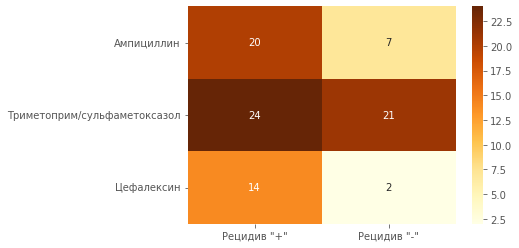

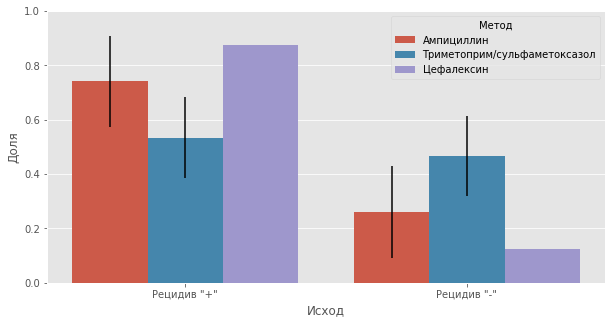

chi^2 = 7.288, v=2, P=0.026
Пограничный случай, есть основания задуматься над наличием различий.


In [61]:
df = pd.DataFrame(data=[[20, 7], [24, 21], [14, 2]], 
                  index=["Ампициллин", "Триметоприм/сульфаметоксазол", "Цефалексин"],
                  columns=["Рецидив \"+\"", "Рецидив \"-\""])

display(df)

sns.heatmap(df, annot=True, cmap="YlOrBr")
barplot_ct(df)

chi2_test(df, silent=False)

Исходя из графиков, можно предположить, о возможноти сгруппировать "Ампицилин" и "Цефаликсин" в случае отсутствия статистических различий между ними и сравнить полученную группу с группой "Триметоприм/сульфаметоксазол".
Поскольку надо провести 2 сравнения, то стоит помнить про поправку Бонферрони для множественных сравнения.

In [62]:
chi2_test(df.loc[["Ампициллин", "Цефалексин"]], bonf=2, silent=False)

Не выполнено условие применимости для матрицы 2х2, в ожидаемой матрице существует элемент < 5
Критерий CHI2 не применим для этих данных.
Применение точного критерия Фишера.
P=0.446
Отличия статистически не значимы.


,"Рецидив ""+""","Рецидив ""-"""
Триметоприм/сульфаметоксазол,24,21
Ампициллин + Цефалексин,34,9


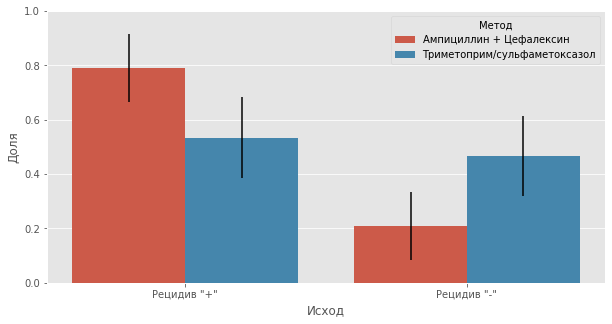

chi^2 = 5.387, v=1, P=0.020
Пограничный случай, есть основания задуматься над наличием различий.


In [8]:
new_df = df.pipe(combine_rows, ["Ампициллин", "Цефалексин"])

display(new_df)

barplot_ct(new_df)

chi2_test(new_df, bonf=2, silent=False)

Итак, Триметоприм/сульфаметоксазол превосходит как ампициллин, так и цефалексин, которые 
друг от друга не отличаются.

**5.5.**
А. О’Нил и соавт. (A. O’Neil et al. A waterborn epidemic of acute infectious non-bacterial gastroenteritis in Alberta, Canada. Can.J. Public Health, 76:199—203, 1985) недавно сообщили о вспышке гастроэнтерита в маленьком канадском городке. Исследователи предположили, что источником инфекции была водопроводная вода. Они исследовали зависимость между количеством выпитой воды и числом заболевших. Какие выводы можно сделать из приводимых данных?

Количество выпитой воды, стаканов в день|Число заболевших|Число не заболевших
-|-|-
Менее 1|39|121
От 1 до 4|264|258
5 и более|265|146

,Заболел,Не заболел
Менее 1,39,121
От 1 до 4,264,258
5 и более,265,146


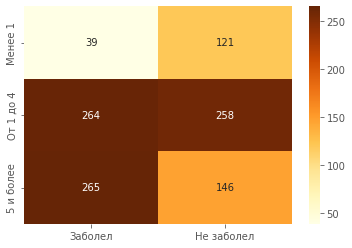

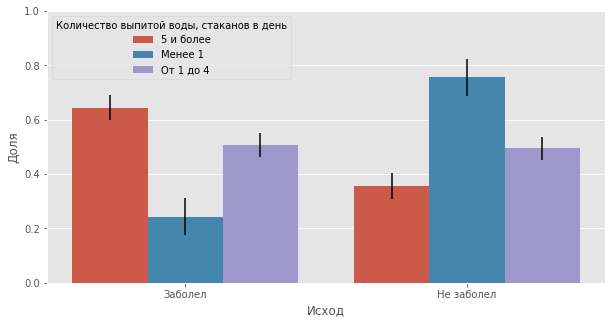

chi^2 = 74.973, v=2, P=0.000
Отличия статистически значимы.


In [9]:
df = pd.DataFrame(data=[[39, 121], [264, 258], [265, 146]], index=["Менее 1", "От 1 до 4", "5 и более"], columns=["Заболел", "Не заболел"])

display(df)

sns.heatmap(df, annot=True, cmap="YlOrBr", fmt='g')
barplot_ct(df, idxname="Количество выпитой воды, стаканов в день")

chi2_test(df, silent=False)

Сравним группы попарно, чтоб убедиться в том, что все группы различны (это видно из последнего графика). Поправка Бонферрони на множественные сравнения = 3.

In [10]:
from itertools import combinations

for i, (idx1, idx2) in enumerate(combinations(df.index, 2), start=1):
    display(Markdown(f"#### {i}: \"{idx1}\" - \"{idx2}\""))
    
    display(df.loc[[idx1, idx2]])

    chi2_test(df.loc[[idx1, idx2]], silent=False, bonf=3)
    
    display(Markdown("---"))

#### 1: "Менее 1" - "От 1 до 4"

,Заболел,Не заболел
Менее 1,39,121
От 1 до 4,264,258


chi^2 = 32.995, v=1, P=0.000
Отличия статистически значимы.


---

#### 2: "Менее 1" - "5 и более"

,Заболел,Не заболел
Менее 1,39,121
5 и более,265,146


chi^2 = 72.793, v=1, P=0.000
Отличия статистически значимы.


---

#### 3: "От 1 до 4" - "5 и более"

,Заболел,Не заболел
От 1 до 4,264,258
5 и более,265,146


chi^2 = 17.540, v=1, P=0.000
Отличия статистически значимы.


---

Связь заболеваемости с количеством выпитой воды статистически значима. 

Сравнив группы попарно (используя поправку Бонферрони), можно убедиться, что заболеваемость растет с количеством выпитой воды.

**5.6.**
Как правило, качество исследования выше, а соответствие собираемых данных поставленному вопросу точнее, если данные собираются специально для этого исследования после его планирования. Р. и С. Флетчеры (R. Fletcher, S. Fletcher. Clinical research in general medical journals: а 30-year perspective. N. Engl. J. Med., 301:180—183, 1979) исследовали 612 работ, случайным образом выбранных из журналов Journal of American Medical Association, Lancet и New England Journal of Medicine, чтобы определить, собирали ли их авторы свои данные до или после планирования исследования. Вот что удалось обнаружить:

_|1946|1956|1966|1976
-|-|-|-|-
Число рассмотренных работ|151|149|157|155
Процент работ, где данные собирали после планирования исследования|76|71|49|44
Процент работ, где данные собирали до планирования исследования|24|29|51|56


Оцените статистическую значимость различия долей. Если различия есть, то можно ли сказать, что положение меняется к лучшему?

,1946,1956,1966,1976
"Процент работ, где данные собирали после планирования исследования",115,106,77,68
"Процент работ, где данные собирали до планирования исследования",36,43,80,87


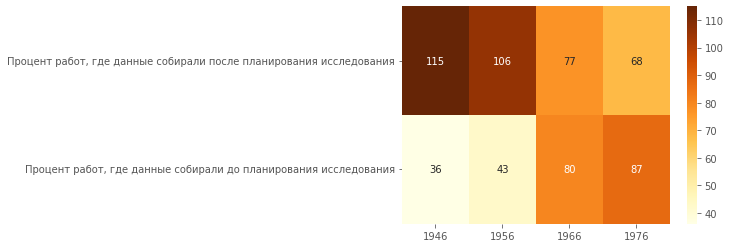

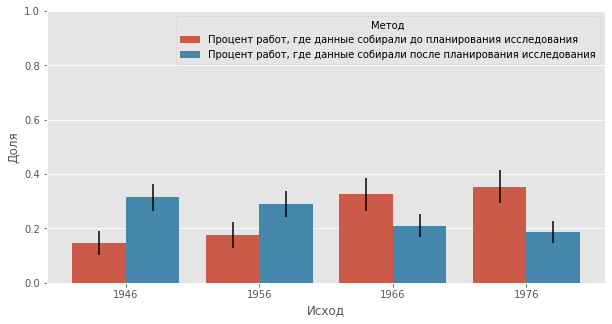

chi^2 = 48.698, v=3, P=0.000
Отличия статистически значимы.


In [11]:
df = pd.DataFrame(data=[[151, 149, 157, 155], [76, 71, 49, 44], [24, 29, 51, 56]], 
                  index=["Число рассмотренных работ", 
                         "Процент работ, где данные собирали после планирования исследования", 
                         "Процент работ, где данные собирали до планирования исследования"], 
                  columns=[1946, 1956, 1966, 1976])

df.loc["Процент работ, где данные собирали после планирования исследования"] = \
       (df.loc["Число рассмотренных работ"] * df.loc["Процент работ, где данные собирали после планирования исследования"] / 100).round()
df.loc["Процент работ, где данные собирали до планирования исследования"] = \
       (df.loc["Число рассмотренных работ"] * df.loc["Процент работ, где данные собирали до планирования исследования"] / 100).round()
df.drop("Число рассмотренных работ", inplace=True)

display(df)
sns.heatmap(df, annot=True, cmap="YlOrBr", fmt='g')
barplot_ct(df)

chi2_test(df, silent=False)

Из графиков можно предположить о схожести групп 1946 и 1956, а так же групп 1966 и 1976. Если это так, то можно их сруппировать и сравнить полученные группы между собой. 
Всего надо сделать 3 сравнени, т.о. поправка Бонферрони = 3.

In [12]:
chi2_test(df[[1946, 1956]], bonf=3, silent=False)

chi^2 = 0.732, v=1, P=0.392
Отличия статистически не значимы.


In [13]:
chi2_test(df[[1966, 1976]], bonf=3, silent=False)

chi^2 = 0.644, v=1, P=0.422
Отличия статистически не значимы.


,1946 + 1956,1966 + 1976
"Процент работ, где данные собирали после планирования исследования",221,145
"Процент работ, где данные собирали до планирования исследования",79,167


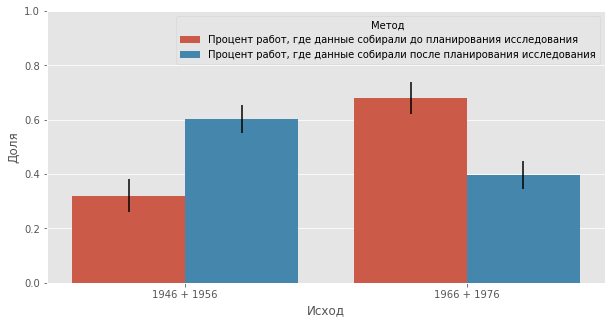

chi^2 = 45.920, v=1, P=0.000
Отличия статистически значимы.


In [14]:
new_df = df.pipe(combine_cols, [1946, 1956]).pipe(combine_cols, [1966, 1976])

display(new_df)

barplot_ct(new_df)

chi2_test(new_df, bonf=3, silent=False)

Разбиение таблицы показывает, что не отличаются 1946 от 1956 г. и 1966 от 1976 г.

Объединенная группа 1946 и 1956 гг. отличается в лучшую сторону от объединенной группы 1966 и 1976 гг. Таким образом, между 1956 и 1966 г. ситуация изменилась к худшему.

**5.7.**

Одна из причин инсульта — окклюзия сонной артерии. Чтобы выяснить, какое лечение — медикаментозное или хирургическое — дает в этом случае лучшие результаты, У. Филдс и соавт. (W. Fields et al. Joint study of extracranial arterial occlusion, V: Progress report of prognosis following surgery or nonsurginal treatment for transient ishemic attacks and cervical carotid artery lesions. JAMA, 211:1993—2003, 1970) сравнили долгосрочный прогноз у леченных двумя методами.


Лечение|Повторный инсульт или смерть|Долгосрочное выживание
-|-|-
Хирургическое|43|36
Медикаментозное|53|19

Можно ли говорить о превосходстве одного из видов лечения?

,Повторный инсульт или смерть,Долгосрочное выживание
Хирургическое,43,36
Медикаментозное,53,19


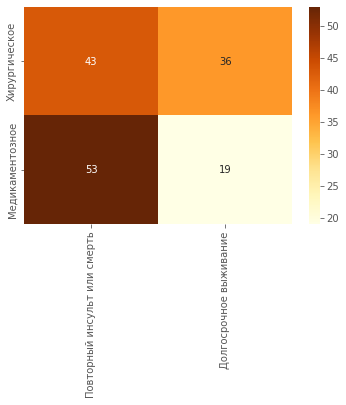

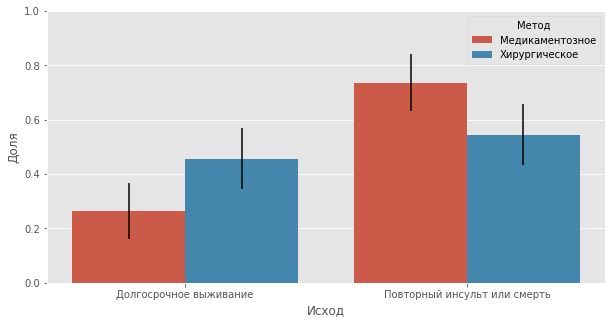

chi^2 = 5.185, v=1, P=0.023
Пограничный случай, есть основания задуматься над наличием различий.


In [51]:
df = pd.DataFrame(data=[[43, 36], [53, 19]],
                  columns=["Повторный инсульт или смерть", "Долгосрочное выживание"],
                  index=["Хирургическое", "Медикаментозное"])

display(df)
sns.heatmap(df, annot=True, cmap="YlOrBr", fmt='g')
barplot_ct(df)

chi2_test(df, silent=False)

Различия (в пользу хирургического лечения) статистически значимы.

**5.8.**
В диагностике ишемической болезни сердца используют нагрузочную пробу, с помощью физической нагрузки вызывают ишемию миокарда, которую выявляют на ЭКГ. Существует другой метод, ишемию вызывают внутривенным введением дипиридамола, а выявляют с помощью эхокардиографии. Ф. Латтанци и соавт. (F. Lattanzi et al. Inhibition of dipyndamole-induced ishemia by
antianginal therapy in humans: correlation with exercise electrocardiography. Circulation, 83:1256—1262, 1991) сравнили результаты двух методов у больных, получавших и не получавших антиангинальную терапию. Результаты приведены в таблице.

Без антиангинальной терапии:

_|Дипиридамол + эхокардиография "+"|"-"
-|-|-
**Нагрузка + ЭКГ "+"**|38|2
"-"|14|3

На фоне антиангинальной терапии:
_|Дипиридамол + эхокардиография "+"|"-"
-|-|-
**Нагрузка + ЭКГ "+"**|21|6
"-"|16|14

Оцените различия между результатами двух методов.

In [18]:
pd.MultiIndex.from_product([["Без антиангинальной терапии", "На фоне антиангинальной терапии"], ["Дипиридамол + эхокардиография"], ["+", "-"]])

MultiIndex([(    'Без антиангинальной терапии', ...),
            (    'Без антиангинальной терапии', ...),
            ('На фоне антиангинальной терапии', ...),
            ('На фоне антиангинальной терапии', ...)],
           )

In [67]:
df = pd.DataFrame(data=[[38, 2, 21, 6], [14, 3, 16, 14]], 
                  columns=pd.MultiIndex.from_product([["Без антиангинальной терапии", "На фоне антиангинальной терапии"], ["impact \"+\"", "impact \"-\""]]),
                  index=["Нагрузка + ЭКГ \"+\"", "Нагрузка + ЭКГ \"-\""])

In [56]:
df

Без антиангинальной терапии             \
                                    impact "+" impact "-"   
Нагрузка + ЭКГ "+"                          38          2   
Нагрузка + ЭКГ "-"                          14          3   

                   На фоне антиангинальной терапии             
                                        impact "+" impact "-"  
Нагрузка + ЭКГ "+"                              21          6  
Нагрузка + ЭКГ "-"                              16         14

#### 1. Без антиангинальной терапии

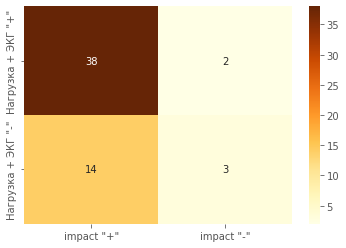

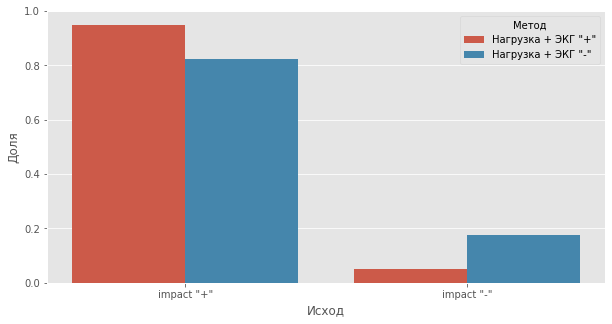

Не выполнено условие применимости для матрицы 2х2, в ожидаемой матрице существует элемент < 5
Критерий CHI2 не применим для этих данных.
Применение точного критерия Фишера.
P=0.151
Отличия статистически не значимы.


---

#### 2. На фоне антиангинальной терапии

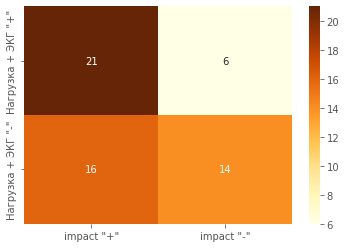

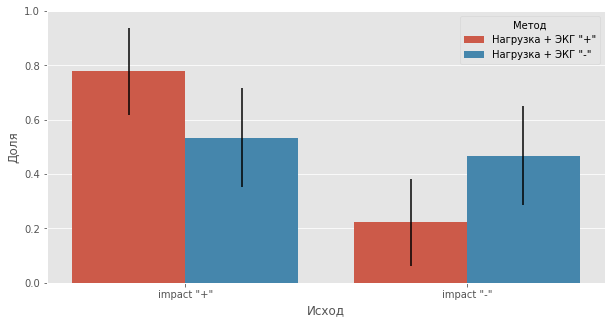

chi^2 = 2.732, v=1, P=0.098
Отличия статистически не значимы.


---

In [59]:
for i, (factor, new_df) in enumerate(df.groupby(level=0, axis=1), start=1):
    display(Markdown(f"#### {i}. {factor}"))
    sns.heatmap(new_df.droplevel(0,1), annot=True, cmap="YlOrBr", fmt='g')
    plt.show()
    barplot_ct(new_df.droplevel(0,1))

    chi2_test(new_df.droplevel(0,1), silent=False)

    display(Markdown("---"))

Для единообразия, можно использовать точный критерий Фишера и для случая "На фоне антиангинальной терапии". Что даст весьма схожий результат.

In [68]:
_, p = fisher_exact(df["На фоне антиангинальной терапии"], alternative='two-sided')
print(f"P={p:.3f}")

P=0.094


Вывод: В обоих случаях различия статистически не значимы.

**5.9.**
Д. Сакетт и М. Гент (D. Sackett, M. Gent. Controversy in counting and attributing events in clinical trials. N. Engl. J. Med., 301:1410—1412, 1979) сделали важное замечание относительно методики сбора данных в исследовании результатов медикаментозного и хирургического лечения окклюзии сонной артерии (задача 5.7). Так как изучался «долгосрочный прогноз», в исследование включали только тех больных, которые не умерли и у которых не было повторного инсульта во время госпитализации. В результате из рассмотрения были исключены 15 оперированных (5 из них умерли, а у 10 инсульт произошел вскоре после операции) и только 1 больной, лечившийся медикаментозно. Если учесть и этих 16 больных, то данные примут такой вид:

Лечение|Повторный инсульт или смерть|Долгосрочное выживание
-|-|-
Хирургическое|58|36
Медикаментозное|54|19

Что теперь можно сказать о предпочтительности одного из видов лечения? Какое сравнение более верно — с учетом этих 16 больных или без их учета (как в задаче 5.7)? Почему?

,Повторный инсульт или смерть,Долгосрочное выживание
Хирургическое,58,36
Медикаментозное,54,19


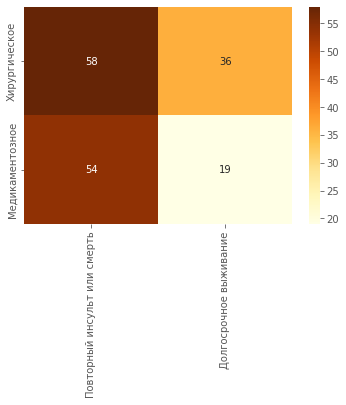

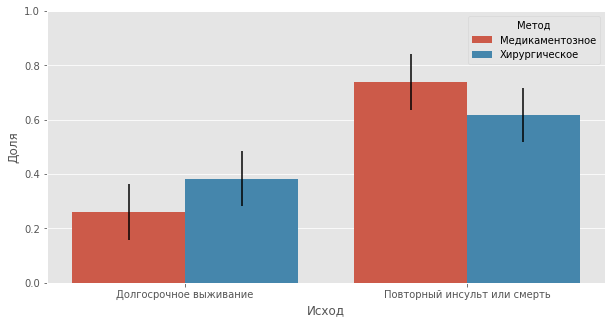

chi^2 = 2.273, v=1, P=0.132
Отличия статистически не значимы.


In [69]:
df = pd.DataFrame(data=[[58, 36], [54, 19]],
                  columns=["Повторный инсульт или смерть", "Долгосрочное выживание"],
                  index=["Хирургическое", "Медикаментозное"])

display(df)
sns.heatmap(df, annot=True, cmap="YlOrBr", fmt='g')
barplot_ct(df)

chi2_test(df, silent=False)

Теперь статистически значимых различий нет.

**5.10.**
Распространенность болезни X равна 10%. Болезнью Y страдает 1000 человек, болезнью Z — также 1000 человек. Болезнь X с равной вероятностью поражает страдающих болезнями Y и Z. Вероятность госпитализации при этих болезнях разная: для болезни X она составляет 40%, Y — 50%, Z — 20%. Посмотрим, сколько больных с разными сочетаниями болезней окажется в больнице.

Из 1000 человек, страдающих болезнью Y, болезнь X имеют 10%, то есть 100 человек. Из них 50% (50 человек) будут госпитализированы в связи с болезнью Y, из оставшихся 50 человек в связи с болезнью X госпитализируют 40%, то есть 20 человек. Таким образом, в больнице окажется 70 больных с сочетанием болезней Y и X.

Из 900 человек, страдающих болезнью Y, но не X, будут госпитализированы 50%, то есть 450 человек.

Такой же расчет для болезни Z показывает, что в больницу попадет 52 человека с сочетанием болезней Z и X, а с болезнью Z, но не Х, — 180 человек.

Исследователь, работающий в больнице в которую попали все госпитализированные, обнаружил следующую связь.

_|С болезнью X|Без болезни X
-|-|-
Болезнь Y|70|450
Болезнь Z|52|180

Оцените статистическую значимость различий частоты болезни X среди страдающих болезнями Y и Z. Можно ли по этим данным судить о связи болезней Y и Z с болезнью X? (Приведенный пример заимствован из работы: D. Mainland. The risk of fallacious conclusions from autopsy data on the incidence of diseases with applications to heart disease. Am. Heart J., 45:644—654, 1953).

,С болезнью X,Без болезни X
Болезнь Y,70,450
Болезнь Z,52,180


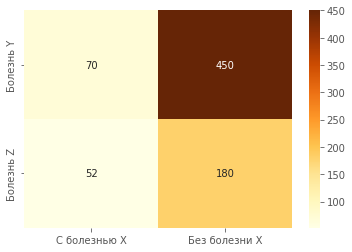

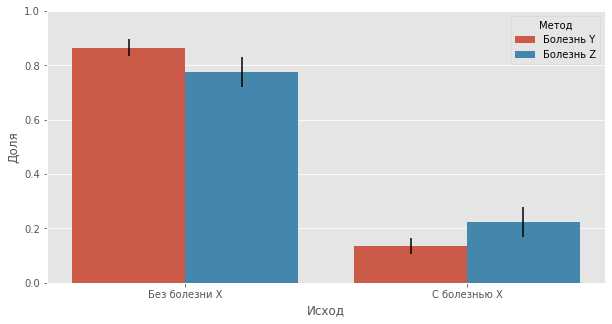

chi^2 = 8.812, v=1, P=0.003
Отличия статистически значимы.


In [71]:
df = pd.DataFrame(data=[[70, 450], [52, 180]],
                  columns=["С болезнью X", "Без болезни X"],
                  index=["Болезнь Y", "Болезнь Z"])

display(df)
sns.heatmap(df, annot=True, cmap="YlOrBr", fmt='g')
barplot_ct(df)

chi2_test(df, silent=False)

Различия статистически значимы: в больнице среди страдающих болезнью Z доля больных Х выше, чем среди страдающих болезнью Y. 

Эти различия обусловлены исключительно разной вероятностью госпитализации при этих болезнях.